Before analyzing individual time series, let's explore the full dataset first. The dataset is a collection of `.parquet` files, each consisting of an array of game state data of shape `(frames, features)` extracted from raw `.replay` files.

In [40]:
from impulse.analysis import ReplayDataset

import matplotlib.pyplot as plt

In [3]:
from pathlib import Path

project_root = Path('/Users/david/dev/impulse')
data_dir = project_root / 'replays/parsed'
db_path = project_root / 'impulse.db'

replays = ReplayDataset(db_path=str(db_path), data_dir=str(data_dir))

Let's check how many parsed replays we have:

In [4]:
len(replays)

Found 192 parsed replays in database


192

What does a `replay` object (as a member of a `ReplayDataset`) look like? It's a tuple of length 3 in the format `(replay_id, DataFrame, metadata)`:

In [16]:
sample_list = replays.load_sample(1)        # load a random replay
print([type(k) for k in sample_list[0]])    # inspect the types of the elements in the sample tuple

Loaded 1 replays
[<class 'str'>, <class 'pandas.core.frame.DataFrame'>, <class 'dict'>]


In [17]:
sample_list[0][0]

'3D481C5B4E6B72CAAEC31E882E47F29D'

In [42]:
sample_list[0][1].head()

,frame,current time,frame time,seconds remaining,Ball - position x,Ball - position y,Ball - position z,Ball - linear velocity x,Ball - linear velocity y,Ball - linear velocity z,...,p5_angular velocity z,p5_quaternion x,p5_quaternion y,p5_quaternion z,p5_quaternion w,p5_boost level,p5_dodge active,p5_jump active,p5_double jump active,p5_player demolished by
0,0,13.278890,13.310669,300.0,4.650000,14.640000,92.709999,314.700012,2447.989990,154.240005,...,-0.250000,-0.004653,-0.001276,0.965668,-0.259736,5.694581,4.0,4.0,0.0,-1.0
1,1,13.378890,13.412356,300.0,36.139999,260.140015,104.570000,313.739990,2440.520020,88.809998,...,3.270000,-0.004653,-0.001260,0.965578,-0.260071,0.000000,4.0,4.0,0.0,-1.0
2,2,13.478890,13.480196,300.0,62.240002,463.239990,109.470001,312.940002,2434.320068,34.450001,...,0.640000,-0.004653,-0.001260,0.965423,-0.260642,0.000000,4.0,4.0,0.0,-1.0
3,3,13.578891,13.581873,300.0,93.480003,706.270020,109.410004,311.980011,2426.879883,-30.570000,...,0.190000,-0.004653,-0.001260,0.965393,-0.260756,0.000000,4.0,4.0,0.0,-1.0
4,4,13.678891,13.683533,300.0,124.629997,948.549988,102.870003,311.019989,2419.439941,-95.330002,...,-91.760002,-0.004648,-0.001254,0.968544,-0.248795,0.000000,4.0,4.0,0.0,-1.0


In [19]:
sample_list[0][2]

{'replay_id': '3D481C5B4E6B72CAAEC31E882E47F29D',
 'frame_count': 3086,
 'feature_count': 161,
 'fps': 10.0,
 'parsed_at': '2026-01-31T00:09:57.010319+00:00',
 'source_file': '/Users/david/dev/impulse/replays/raw/rlcs/2024/World Championship/[2] Playoffs/[1] Lower Round 1/FUR vs SSG/c3ddc3e1-838b-4da3-bf8c-6cc2f49f355e.replay',
 'replay_name': 'WORLDS P-C FUR vs SSG G5 2024-09-14.16.15',
 'date': '2024-09-14 16-15-43',
 'map': 'Underwater_GRS_P',
 'match_type': 'Lan',
 'team_size': 3,
 'num_frames': 9479,
 'duration_seconds': 308.6,
 'team_0_score': None,
 'team_1_score': 1,
 'goals': [{'PlayerName': 'Chicago', 'PlayerTeam': 1, 'frame': 2324}],
 'highlights': [{'BallName': 'Ball_TA_74',
   'CarName': 'Car_TA_459',
   'GoalActorName': 'None',
   'frame': 2149},
  {'BallName': 'Ball_TA_74',
   'CarName': 'Car_TA_464',
   'GoalActorName': 'GoalVolume_TA_0',
   'frame': 2324},
  {'BallName': 'Ball_TA_76',
   'CarName': 'Car_TA_479',
   'GoalActorName': 'None',
   'frame': 5312},
  {'BallNa

### Exploring a single replay dataframe

In [31]:
replay_id, df, metadata = sample_list[0]

In [32]:
df.columns

Index(['frame', 'current time', 'frame time', 'seconds remaining',
       'Ball - position x', 'Ball - position y', 'Ball - position z',
       'Ball - linear velocity x', 'Ball - linear velocity y',
       'Ball - linear velocity z',
       ...
       'p7_angular velocity z', 'p7_quaternion x', 'p7_quaternion y',
       'p7_quaternion z', 'p7_quaternion w', 'p7_boost level',
       'p7_dodge active', 'p7_jump active', 'p7_double jump active',
       'p7_player demolished by'],
      dtype='object', length=161)

In [33]:
df.shape

(3086, 161)

As seen above, the shape of the dataframe is `(frame_count, feature_count)`:

In [34]:
frame_count = metadata['frame_count']
feature_count = metadata['feature_count']
print(f"Frame count: {frame_count},\nFeature count: {feature_count}")

Frame count: 3086,
Feature count: 161


In [35]:
df.describe()

,frame,current time,frame time,seconds remaining,Ball - position x,Ball - position y,Ball - position z,Ball - linear velocity x,Ball - linear velocity y,Ball - linear velocity z,...,p7_angular velocity z,p7_quaternion x,p7_quaternion y,p7_quaternion z,p7_quaternion w,p7_boost level,p7_dodge active,p7_jump active,p7_double jump active,p7_player demolished by
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1542.500000,179.573863,179.590709,147.939728,-347.505469,-92.035618,801.741202,-5.065907,-17.259164,0.538633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,890.995791,94.173006,94.172926,88.354683,2567.896973,2959.139016,540.168875,1128.005462,1332.724275,577.391917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,13.278890,13.310669,0.000000,-4002.540039,-5036.240234,82.879997,-3178.479980,-3022.060059,-1756.800049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,771.250000,106.202833,106.220886,71.000000,-2693.150024,-2795.889893,308.479996,-730.990005,-1012.650009,-378.515007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1542.500000,183.330872,183.360016,148.000000,-521.174988,-168.764999,734.829987,-136.400002,-52.789999,-5.555000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2313.750000,260.460564,260.464027,225.000000,2062.710022,2472.510071,1222.887512,626.050003,1055.799988,372.470001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3085.000000,337.590271,337.598877,300.000000,4003.129883,5078.609863,1951.670044,3270.320068,3507.020020,2137.860107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe is padded with additional columns to accomodate features for up to 8 total players (two teams of four players). However, this replay is from a 3v3 RLCS match: 

In [36]:
team_size = metadata['team_size']
team_size

3

Therefore we can remove the extra columns. Let's drop the columns that consist exclusively of NaN values:

In [37]:
df.dropna(axis=1, how='all', inplace=True) 
df.shape

(3086, 125)

In [38]:
df.isnull().sum()

frame                      0
current time               0
frame time                 0
seconds remaining          0
Ball - position x          0
                          ..
p5_boost level             0
p5_dodge active            0
p5_jump active             0
p5_double jump active      0
p5_player demolished by    0
Length: 125, dtype: int64

Now there are no NaN values in the dataframe. 

## Looking at dataset-level statistics

### Replay length

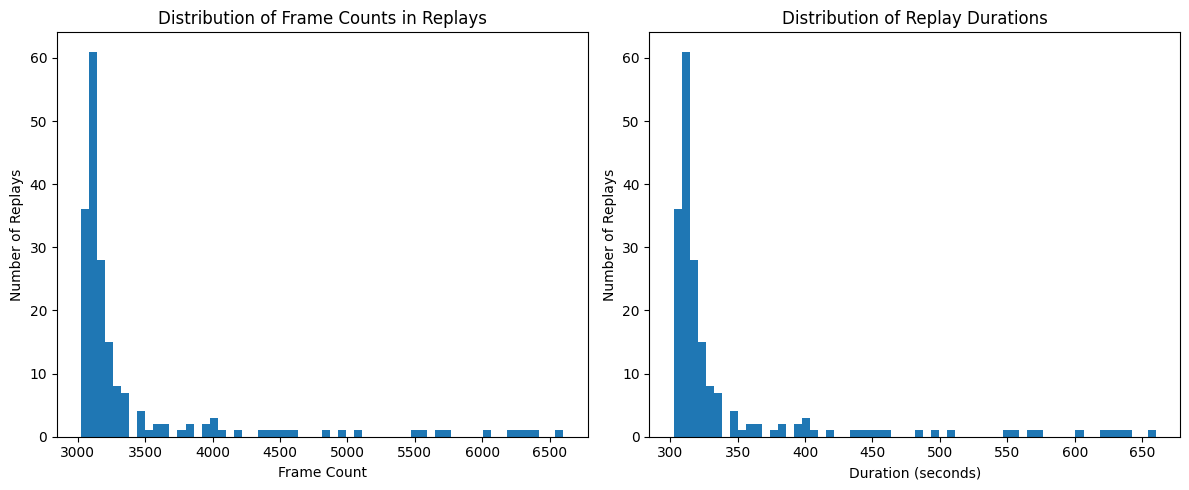

In [ ]:
frame_counts = [metadata['frame_count'] for _, _, metadata in replays]
duration_seconds = [metadata['duration_seconds'] for _, _, metadata in replays]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(frame_counts, bins=60)
ax1.set_title('Distribution of Frame Counts in Replays')
ax1.set_xlabel('Frame Count')
ax1.set_ylabel('Number of Replays')

ax2.hist(duration_seconds, bins=60)
ax2.set_title('Distribution of Replay Durations')
ax2.set_xlabel('Duration (seconds)')
ax2.set_ylabel('Number of Replays')
plt.tight_layout()
plt.show()

Since replay files are sampled at 10 FPS by the parser, it makes sense that these plots look identical and that the scale of their horizontal axes differs by a factor of 10. 

This data comes from the RLCS 2024 World Championship, so each game should be a 3v3 game. We can verify that all replays have a `team_size` of 3:

In [54]:
team_size = [metadata['team_size'] for _, _, metadata in replays]
team_size_set = set(team_size)
team_size_set

{3}